In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=1./255)

In [3]:
x_train = train_gen.flow_from_directory(r"split/train",target_size=(300,300),
                                            color_mode="rgb",class_mode="categorical",batch_size=32)

Found 2480 images belonging to 55 classes.


In [4]:
x_test = train_gen.flow_from_directory(r"split/test",target_size=(300,300),
                                            color_mode="rgb",class_mode="categorical",batch_size=32)

Found 857 images belonging to 55 classes.


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as myimg

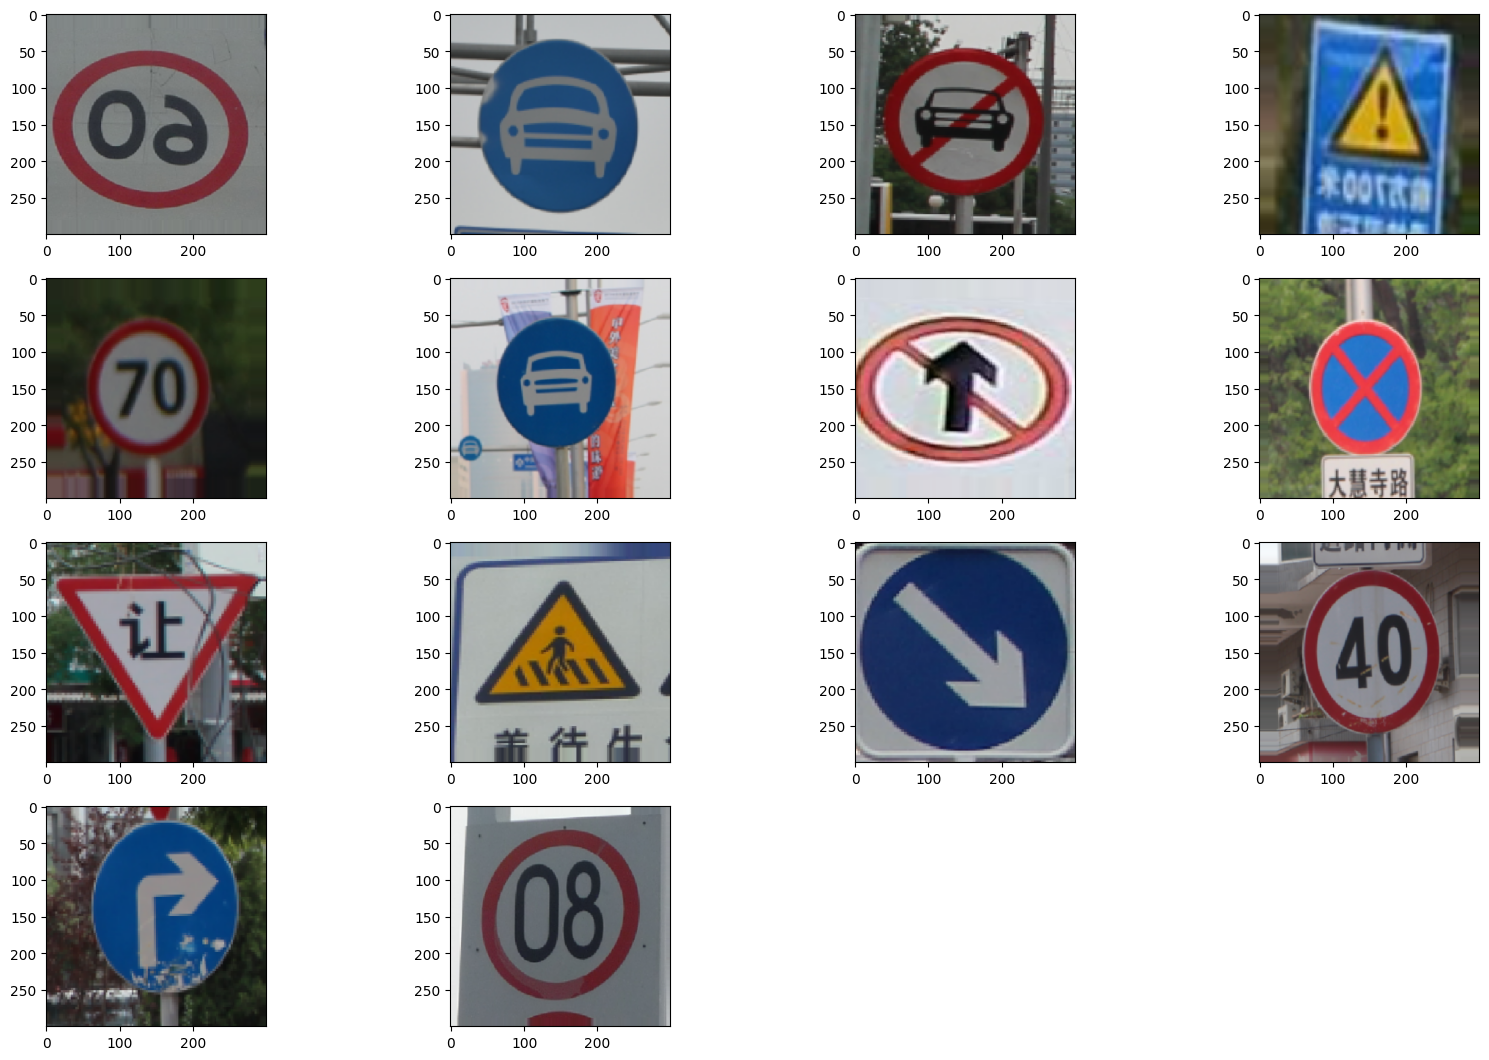

In [6]:
plt.figure(figsize=(20,20))
for i,image in enumerate(x_train,1):
    if(i==15):
        break
    plt.subplot(6,4,i)
    plt.imshow(image[0][15])

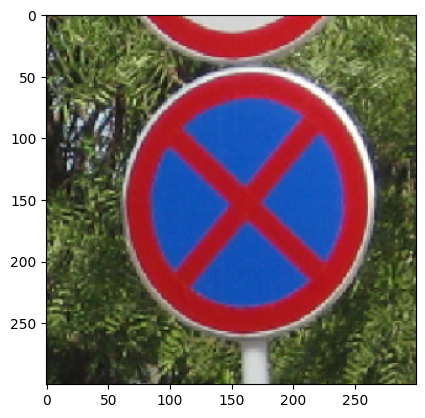

In [7]:
a=plt.imshow(image[0][6])
a

In [8]:
type(a)

matplotlib.image.AxesImage

In [9]:
x_train[0][0].shape

(32, 300, 300, 3)

In [10]:
type(x_train[0][0])

numpy.ndarray

In [11]:
type(x_test[0][0])

numpy.ndarray

# Modeling

In [12]:
cnn = Sequential()

### 1st Convolution layer + Polling layer

In [13]:
cnn.add(Conv2D(filters=32, activation="relu", strides=(2,2), kernel_size=(3,3), input_shape= (300,300,3)))
cnn.add(MaxPool2D(pool_size= (2,2),strides=(2,2)))

### 2nd Convolution layer + Polling layer

In [14]:
cnn.add(Conv2D(filters=32 , kernel_size=(3,3), strides = (2,2), activation="relu"))
cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

### Flatten layer

In [15]:
cnn.add(Flatten())

### Connected layer

In [22]:
cnn.add(Dense(units=300, kernel_initializer="random_uniform", activation="relu"))
cnn.add(Dense(units=300, kernel_initializer="random_uniform", activation="relu"))
cnn.add(Dense(units=300, kernel_initializer="random_uniform", activation="relu"))

### Output layer

In [23]:
cnn.add(Dense(units=55, kernel_initializer="random_uniform", activation="softmax"))

### Compile

In [24]:
cnn.compile(loss=['categorical_crossentropy'], optimizer="adam" , metrics=['accuracy'])

### Summary

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 300)               3

### Training

In [28]:
cnn.fit_generator(x_train, steps_per_epoch=63, epochs=20, validation_data=x_test, validation_steps=21)

C:\Users\Sirisha\AppData\Local\Temp\ipykernel_15572\1262263268.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(x_train, steps_per_epoch=63, epochs=20, validation_data=x_test, validation_steps=21)


Epoch 1/20
63/63 [==============================] - 51s 801ms/step - loss: 1.1025 - accuracy: 0.6186 - val_loss: 1.1870 - val_accuracy: 0.6012
Epoch 2/20
63/63 [==============================] - 48s 756ms/step - loss: 1.0029 - accuracy: 0.6510 - val_loss: 1.0517 - val_accuracy: 0.6696
Epoch 3/20
63/63 [==============================] - 49s 779ms/step - loss: 0.9193 - accuracy: 0.6875 - val_loss: 1.0314 - val_accuracy: 0.6815
Epoch 4/20
63/63 [==============================] - 49s 772ms/step - loss: 0.8719 - accuracy: 0.6939 - val_loss: 0.9300 - val_accuracy: 0.6845
Epoch 5/20
63/63 [==============================] - 49s 776ms/step - loss: 0.7956 - accuracy: 0.7225 - val_loss: 1.0254 - val_accuracy: 0.6562
Epoch 6/20
63/63 [==============================] - 48s 764ms/step - loss: 0.7595 - accuracy: 0.7420 - val_loss: 0.7730 - val_accuracy: 0.7693
Epoch 7/20
63/63 [==============================] - 44s 703ms/step - loss: 0.6788 - accuracy: 0.7585 - val_loss: 0.7398 - val_accuracy: 0.7723

### Saving Model

In [30]:
cnn.save("trafficsigns.h5")

# Prediction of Traffic Signs

In [32]:
from keras.models import load_model
import cv2
import numpy as np

In [33]:
cnnmodel = load_model("trafficsigns.h5")

In [39]:
image = cv2.imread("check.png")

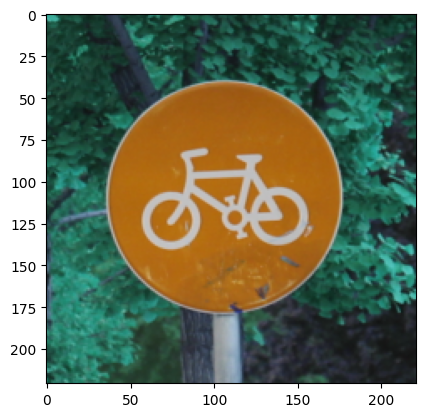

In [40]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [48]:
type(image)

numpy.ndarray

In [51]:
def detect(frame):
    img=cv2.resize(frame,(300,300))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)         #scaling to 0 to 1 range
    if(np.max(img)>1):
        img = img/255.0
    img = np.array([img])
    prediction = cnnmodel.predict(img)
    label=['Bicycles crossing', 'Children crossing', 'Danger Ahead', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Dont Go Left', 'Dont Go Left or Right',
                   'Dont Go Right', 'Dont Go straight','Dont Go straight or left','Dont Go straight or Right','Dont overtake from Left','Fences','Give Way','Go Left','Go Left or right'
                  ,'Go left or straight','Go Right','Go right or straight','Go straight','Go straight or right','Heavy Vehicle Accidents','Horn',
                  'keep Left','keep Right','No Car','No entry','No horn','No stopping','No Uturn','Road Divider',
                  'Roundabout mandatory','Speed limit (15kmh)','Speed limit (30kmh)','Speed limit (40kmh)','Speed limit (50kmh)','Speed limit (5kmh)','Speed limit (60kmh)',
                  'Speed limit (70kmh)','Speed limit (80kmh)','Traffic signals','Train Crossing','Under Construction','Unknown1','Unknown2',
                  'Unknown3','Unknown4','Unknown5','Unknown6','Unknown7','Unknown8','Uturn','watch out for cars',
                  'Zebra Crossing','ZigZag Curve']
    prediction = np.argmax(prediction)
    print("Prediction:",prediction)
    return plt.imshow(img[0]),print(label[prediction])

1/1 [==============================] - 0s 342ms/step
Prediction: 0
Bicycles crossing


(<matplotlib.image.AxesImage at 0x293fb02da00>, None)

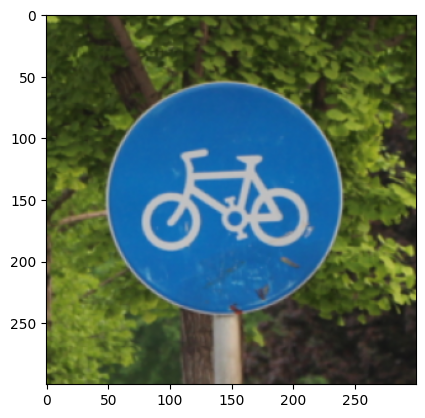

In [52]:
detect(image)